# Taller 04

Estudiante: Anthony Alangasí

Grupo: GR1CC

Fecha: 26/11/2025

## Splines Cúbicos

* Complete el código del siguiente repositorio: https://github.com/ztjona/splines

### Código completo

In [5]:
import sympy as sym
from IPython.display import display


def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * n

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3
        splines.append(S)
    splines.reverse()
    return splines

xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

* Compruebe gráficamente la solución de los siguientes ejercicios:
    - (0,1),(1,5),(2,3)
    - (0,−5),(1,−4),(2,3)
    - (0,−1),(1,1),(2,5),(3,2)
* Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con $B_0 = 1$ para todos los valores de $B_1\ \epsilon\ R$
* Realice una animación de la variación de los splines cúbicos al variar $B_1$
* Realice una animación al mover el punto $x_1$, $y_1$.

### Ejercicio 1

Puntos: $(0,1),(1,5),(2,3)$

In [6]:
import sympy as sym
from IPython.display import display


def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * n

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3
        splines.append(S)
    splines.reverse()
    return splines

xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

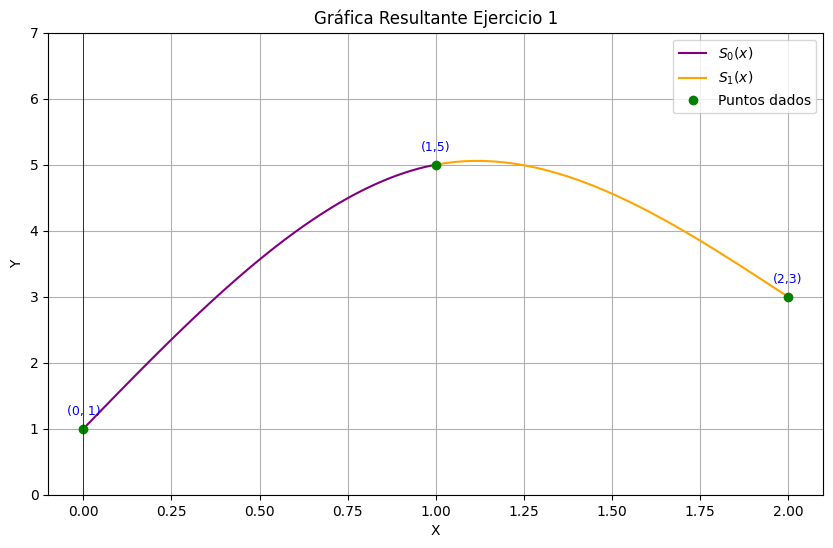

In [7]:
def splin1(x):
    return -1.5*x**3 + 5.5*x + 1

def splin2(x):
    return 1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

from matplotlib.lines import lineStyles
import numpy as np
import matplotlib.pyplot as plt

x0_values = np.linspace(0, 1, 100)
x1_values = np.linspace(1, 2, 100)

y0_f = [splin1(x) for x in x0_values]
y1_f = [splin2(x) for x in x1_values]

x_puntos = [0, 1, 2]
y_puntos = [1, 5, 3]

puntos_a_etiquetar = {
    '(0, 1)': (0, 1), 
    '(1,5)': (1, 5), 
    '(2,3)': (2, 3)
}

plt.figure(figsize=(10, 6))

plt.plot(x0_values, y0_f, label='$S_0(x)$', color='purple', linestyle = '-')
plt.plot(x1_values, y1_f, label='$S_1(x)$', color='orange', linestyle = '-')

plt.plot(
    x_puntos, 
    y_puntos, 
    color='green', 
    marker='o', 
    linestyle='',
    label='Puntos dados'
)

for label, (x, y) in puntos_a_etiquetar.items():
    plt.annotate(
        label,                      
        (x, y),                     
        textcoords="offset points",
        xytext=(0, 10),             
        ha='center',                
        fontsize=9,
        color='blue'
    )

plt.title('Gráfica Resultante Ejercicio 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.ylim(0,7)
plt.legend()
plt.show()

Animación de la variación de splines al variar $B_1$

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def cubic_spline_clamped(xs: list[float], ys: list[float], B0: float, B1: float) -> list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3
        splines.append(S)
    splines.reverse()
    return splines

def graficar_splines_interactivo(B1):
    x_data = [0, 1, 2]
    y_data = [1, 5, 3]
    B0 = 1 
    
    splines = cubic_spline_clamped(x_data, y_data, B0, B1)
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(x_data, y_data, color='purple', s=80, label='Puntos Dados', zorder=5)
    
    x_sym = sym.Symbol("x")
    color_ciclo = ['orange', 'green', 'blue', 'purple']
    
    for i, S in enumerate(splines):
        x_vals = np.linspace(x_data[i], x_data[i+1], 50)
        f_num = sym.lambdify(x_sym, S, "numpy")
        y_vals = f_num(x_vals)
        
        if np.isscalar(y_vals):
            y_vals = np.full_like(x_vals, y_vals)
            
        plt.plot(x_vals, y_vals, lw=2, color='black')

    plt.title(f"Spline Cúbico - Frontera Derecha B1 = {B1:.2f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

interact(graficar_splines_interactivo, 
         B1=FloatSlider(min=-20, max=20, step=0.1, value=0, description='Valor B1:'));

Animación al mover el punto $x_1, y_1$

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def actualizar_grafica(pos_x1, pos_y1):
    x_data = [0, pos_x1, 2] 
    y_data = [1, pos_y1, 3]
    
    B0 = 1
    B1 = 0
    
    try:
        splines = cubic_spline_clamped(x_data, y_data, B0, B1)
    except Exception as e:
        print("Esperando valores válidos...", e)
        return

    plt.figure(figsize=(10, 6))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title(f"Spline Ajustable: P1({pos_x1:.2f}, {pos_y1:.2f})")
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.scatter(x_data, y_data, color='purple', s=50, label='Puntos Fijos', zorder=5)
    plt.scatter([pos_x1], [pos_y1], color='orange', s=150, label='Punto Móvil', zorder=6)

    x_sym = sym.Symbol("x")
    
    points_sorted_raw = sorted(zip(x_data, y_data), key=lambda x: x[0])
    xs_final = [x for x, _ in points_sorted_raw]
    
    todos_x_vals = []
    todos_y_vals = []

    for i in range(len(splines)):
        x_tramo = np.linspace(xs_final[i], xs_final[i+1], 50)
        
        func_num = sym.lambdify(x_sym, splines[i], "numpy")
        y_tramo = func_num(x_tramo)
        
        if np.isscalar(y_tramo):
            y_tramo = np.full_like(x_tramo, y_tramo)
            
        plt.plot(x_tramo, y_tramo, 'black', lw=2)
        
        todos_x_vals.extend(x_tramo)
        todos_y_vals.extend(y_tramo)

    plt.plot([], [], 'black', lw=2, label='Spline Cúbico')

    if todos_x_vals and todos_y_vals:
        min_x, max_x = min(todos_x_vals), max(todos_x_vals)
        min_y, max_y = min(todos_y_vals), max(todos_y_vals)
        
        margen_x = (max_x - min_x) * 0.1 if (max_x != min_x) else 1.0
        margen_y = (max_y - min_y) * 0.1 if (max_y != min_y) else 1.0
        
        plt.xlim(min_x - margen_x, max_x + margen_x)
        plt.ylim(min_y - margen_y, max_y + margen_y)
    
    plt.legend(loc='upper left')
    plt.show()

slider_x = FloatSlider(
    value=1.0,       
    min=0.1,         
    max=1.9,         
    step=0.1, 
    description='Posición X1:'
)

slider_y = FloatSlider(
    value=5.0, 
    min=-20,   
    max=20,    
    step=0.5, 
    description='Altura Y1:'
)

interact(actualizar_grafica, pos_x1=slider_x, pos_y1=slider_y);

interactive(children=(FloatSlider(value=1.0, description='Posición X1:', max=1.9, min=0.1), FloatSlider(value=…

### Ejercicio 2

Puntos: $(0,−5),(1,−4),(2,3)$

In [ ]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

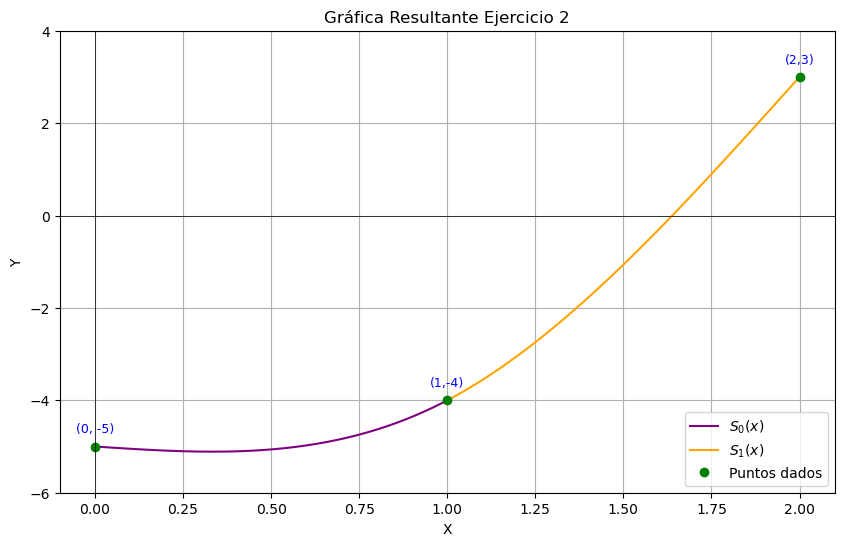

In [ ]:
def splin1(x):
    return 1.5*x**3 - 0.5*x - 5

def splin2(x):
    return -1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

from matplotlib.lines import lineStyles
import numpy as np
import matplotlib.pyplot as plt

x0_values = np.linspace(0, 1, 100)
x1_values = np.linspace(1, 2, 100)

y0_f = [splin1(x) for x in x0_values]
y1_f = [splin2(x) for x in x1_values]

x_puntos = [0, 1, 2]
y_puntos = [-5, -4, 3]

puntos_a_etiquetar = {
    '(0, -5)': (0, -5), 
    '(1,-4)': (1,-4), 
    '(2,3)': (2, 3)
}

plt.figure(figsize=(10, 6))

plt.plot(x0_values, y0_f, label='$S_0(x)$', color='purple', linestyle = '-')
plt.plot(x1_values, y1_f, label='$S_1(x)$', color='orange', linestyle = '-')

plt.plot(
    x_puntos, 
    y_puntos, 
    color='green', 
    marker='o', 
    linestyle='',
    label='Puntos dados'
)

for label, (x, y) in puntos_a_etiquetar.items():
    plt.annotate(
        label,                      
        (x, y),                     
        textcoords="offset points",
        xytext=(0, 10),             
        ha='center',                
        fontsize=9,
        color='blue'
    )

plt.title('Gráfica Resultante Ejercicio 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.ylim(-6,4)
plt.legend()
plt.show()

Animación de la variación de splines al variar $B_1$

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def graficar_splines_interactivo(B1):
    x_data = [0, 1, 2]
    y_data = [-5, -4, 3]
    B0 = 1 
    
    splines = cubic_spline_clamped(x_data, y_data, B0, B1)
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(x_data, y_data, color='purple', s=80, label='Puntos Dados', zorder=5)
    
    x_sym = sym.Symbol("x")
    color_ciclo = ['orange', 'green', 'blue', 'purple']
    
    for i, S in enumerate(splines):
        x_vals = np.linspace(x_data[i], x_data[i+1], 50)
        f_num = sym.lambdify(x_sym, S, "numpy")
        y_vals = f_num(x_vals)
        
        if np.isscalar(y_vals):
            y_vals = np.full_like(x_vals, y_vals)
            
        plt.plot(x_vals, y_vals, lw=2, color='black')

    plt.title(f"Spline Cúbico - Frontera Derecha B1 = {B1:.2f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

interact(graficar_splines_interactivo, 
         B1=FloatSlider(min=-20, max=20, step=0.1, value=0, description='Valor B1:'));

interactive(children=(FloatSlider(value=0.0, description='Valor B1:', max=20.0, min=-20.0), Output()), _dom_cl…

Animación al mover el punto $x_1, y_1$

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def actualizar_grafica(pos_x1, pos_y1):
    x_data = [0, pos_x1, 2] 
    y_data = [-5, pos_y1, 3]
    
    B0 = 1
    B1 = 0
    
    try:
        splines = cubic_spline_clamped(x_data, y_data, B0, B1)
    except Exception as e:
        print("Esperando valores válidos...", e)
        return

    plt.figure(figsize=(10, 6))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title(f"Spline Ajustable: P1({pos_x1:.2f}, {pos_y1:.2f})")
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.scatter(x_data, y_data, color='purple', s=50, label='Puntos Fijos', zorder=5)
    plt.scatter([pos_x1], [pos_y1], color='orange', s=150, label='Punto Móvil', zorder=6)

    x_sym = sym.Symbol("x")
    
    points_sorted_raw = sorted(zip(x_data, y_data), key=lambda x: x[0])
    xs_final = [x for x, _ in points_sorted_raw]
    
    todos_x_vals = []
    todos_y_vals = []

    for i in range(len(splines)):
        x_tramo = np.linspace(xs_final[i], xs_final[i+1], 50)
        
        func_num = sym.lambdify(x_sym, splines[i], "numpy")
        y_tramo = func_num(x_tramo)
        
        if np.isscalar(y_tramo):
            y_tramo = np.full_like(x_tramo, y_tramo)
            
        plt.plot(x_tramo, y_tramo, 'black', lw=2)
        
        todos_x_vals.extend(x_tramo)
        todos_y_vals.extend(y_tramo)

    plt.plot([], [], 'black', lw=2, label='Spline Cúbico') # Para leyenda

    if todos_x_vals and todos_y_vals:
        min_x, max_x = min(todos_x_vals), max(todos_x_vals)
        min_y, max_y = min(todos_y_vals), max(todos_y_vals)
        
        margen_x = (max_x - min_x) * 0.1 if (max_x != min_x) else 1.0
        margen_y = (max_y - min_y) * 0.1 if (max_y != min_y) else 1.0
        
        plt.xlim(min_x - margen_x, max_x + margen_x)
        plt.ylim(min_y - margen_y, max_y + margen_y)
    
    plt.legend(loc='upper left')
    plt.show()

slider_x = FloatSlider(
    value=1.0,       
    min=0.1,         
    max=1.9,         
    step=0.1, 
    description='Posición X1:'
)

slider_y = FloatSlider(
    value=-4.0, 
    min=-20,   
    max=20,    
    step=0.5, 
    description='Altura Y1:'
)

interact(actualizar_grafica, pos_x1=slider_x, pos_y1=slider_y);

interactive(children=(FloatSlider(value=1.0, description='Posición X1:', max=1.9, min=0.1), FloatSlider(value=…

### Ejercicio 3

Puntos: $(0,−1),(1,1),(2,5),(3,2)$

In [ ]:
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

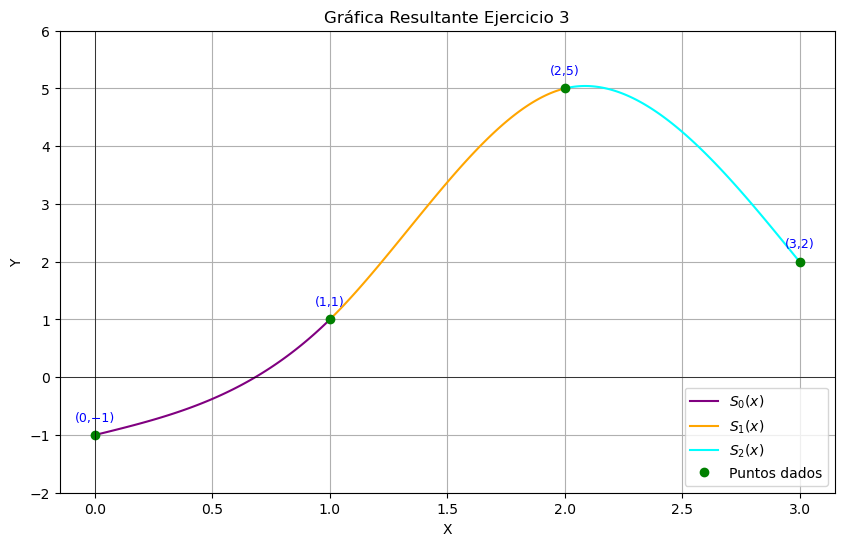

In [ ]:
def splin1(x):
    return 1.0*x**3 + 1.0*x - 1

def splin2(x):
    return -3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

def splin3(x):
    return 2.0*x**3 -18.0*x**2 + 49.0*x - 37.0

from matplotlib.lines import lineStyles
import numpy as np
import matplotlib.pyplot as plt

x0_values = np.linspace(0, 1, 100)
x1_values = np.linspace(1, 2, 100)
x2_values = np.linspace(2, 3, 100)

y0_f = [splin1(x) for x in x0_values]
y1_f = [splin2(x) for x in x1_values]
y2_f = [splin3(x) for x in x2_values]

x_puntos = [0, 1, 2, 3]
y_puntos = [-1, 1, 5, 2]

puntos_a_etiquetar = {
    '(0,−1)': (0,y_puntos[0]), 
    '(1,1)': (1,1), 
    '(2,5)': (2,5),
    '(3,2)': (3,2)
}

plt.figure(figsize=(10, 6))

plt.plot(x0_values, y0_f, label='$S_0(x)$', color='purple', linestyle = '-')
plt.plot(x1_values, y1_f, label='$S_1(x)$', color='orange', linestyle = '-')
plt.plot(x2_values, y2_f, label='$S_2(x)$', color='cyan', linestyle = '-')

plt.plot(
    x_puntos, 
    y_puntos, 
    color='green', 
    marker='o', 
    linestyle='',
    label='Puntos dados'
)

for label, (x, y) in puntos_a_etiquetar.items():
    plt.annotate(
        label,                      
        (x, y),                     
        textcoords="offset points",
        xytext=(0, 10),             
        ha='center',                
        fontsize=9,
        color='blue'
    )

plt.title('Gráfica Resultante Ejercicio 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.ylim(-2,6)
plt.legend()
plt.show()

Animación de la variación de splines al variar $B_1$

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def graficar_splines_interactivo(B1):
    x_data = [0, 1, 2, 3]
    y_data = [-1, 1, 5, 2]
    B0 = 1 
    
    splines = cubic_spline_clamped(x_data, y_data, B0, B1)
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(x_data, y_data, color='purple', s=80, label='Puntos Dados', zorder=5)
    
    x_sym = sym.Symbol("x")
    color_ciclo = ['orange', 'green', 'blue', 'purple']
    
    for i, S in enumerate(splines):
        x_vals = np.linspace(x_data[i], x_data[i+1], 50)
        f_num = sym.lambdify(x_sym, S, "numpy")
        y_vals = f_num(x_vals)
        
        if np.isscalar(y_vals):
            y_vals = np.full_like(x_vals, y_vals)
            
        plt.plot(x_vals, y_vals, lw=2, color='black')

    plt.title(f"Spline Cúbico - Frontera Derecha B1 = {B1:.2f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

interact(graficar_splines_interactivo, 
         B1=FloatSlider(min=-20, max=20, step=0.1, value=0, description='Valor B1:'));

interactive(children=(FloatSlider(value=0.0, description='Valor B1:', max=20.0, min=-20.0), Output()), _dom_cl…

Animación al mover el punto $x_1, y_1$

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def actualizar_grafica(pos_x1, pos_y1):
    x_data = [0, pos_x1, 2, 3] 
    y_data = [-1, pos_y1, 5, 2]
    
    B0 = 1
    B1 = 0
    
    try:
        splines = cubic_spline_clamped(x_data, y_data, B0, B1)
    except Exception as e:
        print("Esperando valores válidos...", e)
        return

    plt.figure(figsize=(10, 6))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title(f"Spline Ajustable: P1({pos_x1:.2f}, {pos_y1:.2f})")
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.scatter(x_data, y_data, color='purple', s=50, label='Puntos Fijos', zorder=5)
    plt.scatter([pos_x1], [pos_y1], color='orange', s=150, label='Punto Móvil', zorder=6)

    x_sym = sym.Symbol("x")
    
    points_sorted_raw = sorted(zip(x_data, y_data), key=lambda x: x[0])
    xs_final = [x for x, _ in points_sorted_raw]
    
    todos_x_vals = []
    todos_y_vals = []

    for i in range(len(splines)):
        x_tramo = np.linspace(xs_final[i], xs_final[i+1], 50)
        
        func_num = sym.lambdify(x_sym, splines[i], "numpy")
        y_tramo = func_num(x_tramo)
        
        if np.isscalar(y_tramo):
            y_tramo = np.full_like(x_tramo, y_tramo)
            
        plt.plot(x_tramo, y_tramo, 'black', lw=2)
        
        todos_x_vals.extend(x_tramo)
        todos_y_vals.extend(y_tramo)

    plt.plot([], [], 'black', lw=2, label='Spline Cúbico') # Para leyenda

    if todos_x_vals and todos_y_vals:
        min_x, max_x = min(todos_x_vals), max(todos_x_vals)
        min_y, max_y = min(todos_y_vals), max(todos_y_vals)
        
        margen_x = (max_x - min_x) * 0.1 if (max_x != min_x) else 1.0
        margen_y = (max_y - min_y) * 0.1 if (max_y != min_y) else 1.0
        
        plt.xlim(min_x - margen_x, max_x + margen_x)
        plt.ylim(min_y - margen_y, max_y + margen_y)
    
    plt.legend(loc='upper left')
    plt.show()

slider_x = FloatSlider(
    value=1.0,       
    min=0.1,         
    max=1.9,         
    step=0.1, 
    description='Posición X1:'
)

slider_y = FloatSlider(
    value=1.0, 
    min=-20,   
    max=20,    
    step=0.5, 
    description='Altura Y1:'
)

interact(actualizar_grafica, pos_x1=slider_x, pos_y1=slider_y);

interactive(children=(FloatSlider(value=1.0, description='Posición X1:', max=1.9, min=0.1), FloatSlider(value=…